### 📚 초급 딥러닝 미션: "퍼셉트론과 다층 퍼셉트론 직접 구현하기"


# 🎯 목표
- 퍼셉트론(perceptron) 모델을 직접 코딩하여 논리 연산(AND, OR, XOR)을 구현한다.
- 다층 퍼셉트론(MLP)을 직접 구현하고, XOR 문제를 해결한다.
- 활성화 함수(sigmoid, ReLU 등)를 직접 만든다.
- 가중치(weight)와 편향(bias)의 행렬 연산을 수작업으로 구현해본다.



## 📂 미션 구성



### Part 1. 퍼셉트론(Perceptron)으로 논리 게이트 구현

퍼셉트론 1개를 이용해 AND, OR 연산을 직접 구현합니다.  
퍼셉트론의 수식:  
$ y = \text{step}(w_1x_1 + w_2x_2 + b) $

**제시할 문제:**
- AND 게이트를 퍼셉트론으로 구현해보고, (0,0), (0,1), (1,0), (1,1) 입력에 대해 출력 결과를 확인하세요.
- OR 게이트도 같은 방식으로 구현하세요.


In [ ]:
import numpy as np

def perceptron(x1, x2, w1, w2, b):
    return 1 if w1*x1 + w2*x2 + b >0 else 0

# and 게이트(-0.7)
def and_gate(x1, x2):
    return perceptron(x1, x2, 0.5, 0.5, -0.7)
# or 게이트(-0.2)
def or_gate(x1, x2):
    return perceptron(x1, x2, 0.5, 0.5, -0.2)

print("AND 게이트:")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(f"{x1}, {x2}: {and_gate(x1, x2)}")

print("\nOR 게이트:")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(f"{x1}, {x2}: {or_gate(x1, x2)}")

AND 게이트:
0, 0: 0
0, 1: 0
1, 0: 0
1, 1: 1

OR 게이트:
0, 0: 0
0, 1: 1
1, 0: 1
1, 1: 1



### Part 2. 다층 퍼셉트론(MLP)으로 XOR 문제 해결

XOR 문제는 단일 퍼셉트론으로 해결할 수 없습니다.  
2개의 은닉 뉴런(hidden neuron)을 가진 간단한 다층 퍼셉트론을 구현하세요.

구성:
- 입력층(2개) → 은닉층(2개 뉴런, 활성화 함수 사용) → 출력층(1개 뉴런, 활성화 함수 사용)

**힌트:**
- 은닉층에서는 ReLU, 출력층에서는 Sigmoid를 사용할 수 있습니다.


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def xor_mlp(x1, x2):
    #은닉층 가중치와 편향
    w1 = np.array([[0.5, -0.5], [0.5,-0.5]])
    b1 = np.array([-0.5, 1.5])

    #출력층 가중치와 편향
    w2 = np.array([1,1])
    b2 = -1

    #은닉층 계산
    h1 = sigmoid(w1[0][0]*x1 + w1[0][1]*x2 + b1[0])
    h2 = sigmoid(w1[1][0]*x1 + w1[1][1]*x2 + b1[1])

    #출력층 계산
    output = sigmoid(h1*w2[0] + h2*w2[1]+ b2)

    return 1 if output > 0.5 else 0

#xor 게이트
print("XOR 게이트:")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(f"{x1}, {x2}: {xor_mlp(x1, x2)}")

XOR 게이트:
0, 0: 1
0, 1: 0
1, 0: 1
1, 1: 1



### Part 3. 활성화 함수 직접 구현하기

- Sigmoid 함수와 ReLU 함수를 직접 정의하세요.

수식:
- Sigmoid:  
$ \sigma(x) = \frac{1}{1 + e^{-x}} $
- ReLU:  
$ \text{ReLU}(x) = \max(0, x) $

**추가 문제:**
- Sigmoid와 ReLU를 각각 그래프로 시각화해서 차이를 설명해보세요.


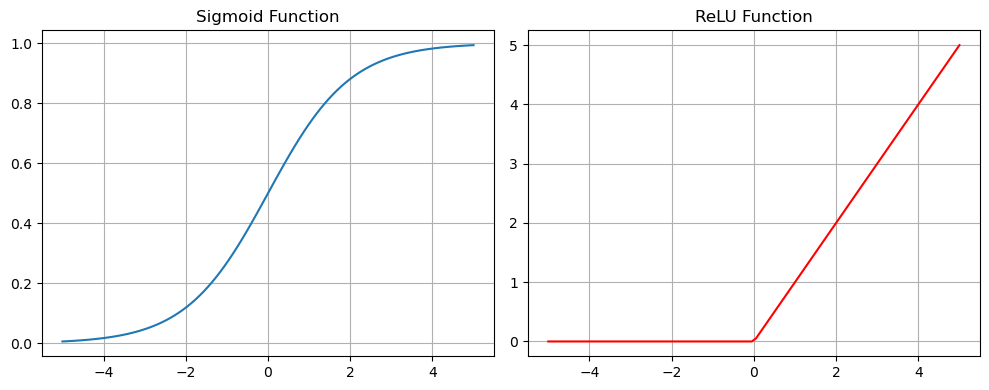

In [5]:
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

# 그래프 시각화
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.title('Sigmoid Function')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x, relu(x), label='ReLU', color='red')
plt.title('ReLU Function')
plt.grid(True)

plt.tight_layout()
plt.show()


### Part 4. 행렬 곱 연산으로 퍼셉트론 계산하기

- 2차원 입력 벡터와 가중치 행렬을 곱해서 퍼셉트론 출력을 계산하세요.
- 넘파이(Numpy)만 사용 가능합니다 (PyTorch, TensorFlow 사용 금지).

**포맷:**
- 입력 $X = [x_1, x_2]$
- 가중치 행렬 $W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{bmatrix}$
- 편향 벡터 $b = [b_1, b_2]$

출력:  
$ y = \text{activation}(XW + b) $


In [10]:
#입력 벡터
X = np.array([[1, 2]]) # 2차원 입력 벡터

#가중치 행렬
W = np.array([[0.5, 0.3], [0.2, 0.4]])

#편향 벡터
b = np.array([0.1, 0.2])

#행렬 곱 연산
def matrix_perceptron(X, W, b):
    #행렬 곱 + 편향
    z = np.dot(X, W) + b

    #relu 활성화 함수 적용
    return np.maximum(0, z)

result = matrix_perceptron(X, W, b)
print("행렬 곱 연산 결과:")
print(result)

행렬 곱 연산 결과:
[[1.  1.3]]



## ✅ 제출할 것
- 각각의 Part에 대해 코드와 출력 결과
- 그래프가 필요한 경우 (활성화 함수 그래프) 시각화 결과 포함
- 각 코드 블록 위에 간단한 설명 주석 추가



## ✨ 추가 보너스 과제 (선택)
- 은닉층 뉴런 수를 2개 이상으로 바꿔보고, XOR 문제 성능 변화를 관찰하세요.
- 시그모이드 대신 하이퍼볼릭 탄젠트 함수(tanh)를 사용해서 비교해보세요.


XOR 문제 실험:

SIGMOID 활성화 함수 사용:

은닉층 뉴런 수: 2
XOR 게이트 결과:
0, 0: 1
0, 1: 1
1, 0: 1
1, 1: 1

은닉층 뉴런 수: 3
XOR 게이트 결과:
0, 0: 1
0, 1: 1
1, 0: 1
1, 1: 1

은닉층 뉴런 수: 4
XOR 게이트 결과:
0, 0: 0
0, 1: 0
1, 0: 0
1, 1: 0

은닉층 뉴런 수: 5
XOR 게이트 결과:
0, 0: 0
0, 1: 0
1, 0: 0
1, 1: 0

TANH 활성화 함수 사용:

은닉층 뉴런 수: 2
XOR 게이트 결과:
0, 0: 0
0, 1: 0
1, 0: 0
1, 1: 0

은닉층 뉴런 수: 3
XOR 게이트 결과:
0, 0: 0
0, 1: 1
1, 0: 0
1, 1: 1

은닉층 뉴런 수: 4
XOR 게이트 결과:
0, 0: 0
0, 1: 1
1, 0: 1
1, 1: 1

은닉층 뉴런 수: 5
XOR 게이트 결과:
0, 0: 1
0, 1: 1
1, 0: 0
1, 1: 0


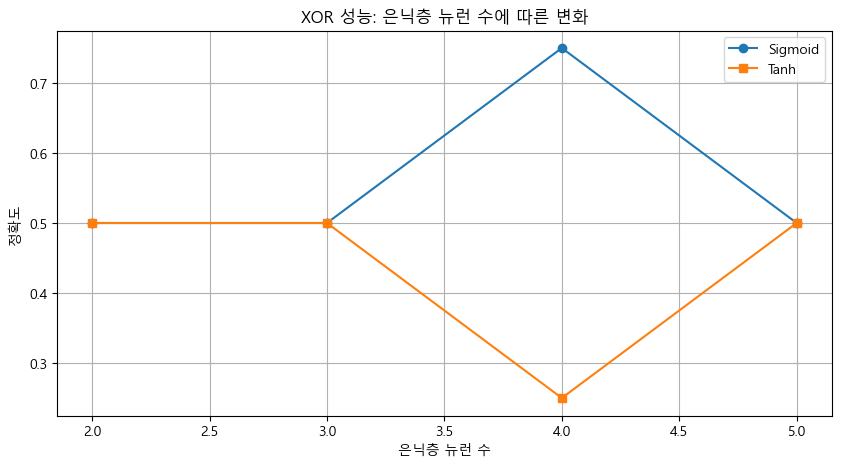

In [ ]:
#claude를 사용하여 풀어보았습니다
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class XORNetwork:
    def __init__(self, hidden_neurons=2, activation='sigmoid'):
        self.hidden_neurons = hidden_neurons
        self.activation = sigmoid if activation == 'sigmoid' else tanh
        
        # 은닉층 가중치와 편향 (동적으로 생성)
        self.w1 = np.random.randn(2, hidden_neurons)
        self.b1 = np.random.randn(hidden_neurons)
        
        # 출력층 가중치와 편향
        self.w2 = np.random.randn(hidden_neurons)
        self.b2 = np.random.randn()
    
    def forward(self, x1, x2):
        # 은닉층 계산 (동적 뉴런 수)
        hidden_outputs = []
        for i in range(self.hidden_neurons):
            hidden_output = self.activation(self.w1[0][i]*x1 + self.w1[1][i]*x2 + self.b1[i])
            hidden_outputs.append(hidden_output)
        
        # 출력층 계산
        output = 0
        for i in range(self.hidden_neurons):
            output += hidden_outputs[i] * self.w2[i]
        output += self.b2
        
        # 활성화 함수 적용
        output = self.activation(output)
        
        return 1 if output > 0.5 else 0

# 다양한 은닉층 뉴런 수와 활성화 함수로 실험
def experiment():
    print("XOR 문제 실험:")
    
    # 은닉층 뉴런 수 변화 실험
    neuron_configs = [2, 3, 4, 5]
    activation_types = ['sigmoid', 'tanh']
    
    for activation in activation_types:
        print(f"\n{activation.upper()} 활성화 함수 사용:")
        for neurons in neuron_configs:
            print(f"\n은닉층 뉴런 수: {neurons}")
            xor_net = XORNetwork(hidden_neurons=neurons, activation=activation)
            
            # XOR 게이트 테스트
            print("XOR 게이트 결과:")
            for x1 in [0, 1]:
                for x2 in [0, 1]:
                    result = xor_net.forward(x1, x2)
                    print(f"{x1}, {x2}: {result}")

# 실험 실행
experiment()

# 성능 시각화 (선택적)
def visualize_xor_performance():
    neurons = [2, 3, 4, 5]
    sigmoid_accuracy = []
    tanh_accuracy = []
    
    for n in neurons:
        # 각 뉴런 수에 대한 정확도 계산
        sigmoid_net = XORNetwork(hidden_neurons=n, activation='sigmoid')
        tanh_net = XORNetwork(hidden_neurons=n, activation='tanh')
        
        # XOR 입력에 대한 정확도 계산
        sigmoid_correct = sum(sigmoid_net.forward(x1, x2) == (x1 ^ x2) 
                               for x1 in [0, 1] for x2 in [0, 1]) / 4
        tanh_correct = sum(tanh_net.forward(x1, x2) == (x1 ^ x2) 
                           for x1 in [0, 1] for x2 in [0, 1]) / 4
        
        sigmoid_accuracy.append(sigmoid_correct)
        tanh_accuracy.append(tanh_correct)
    
    # 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(neurons, sigmoid_accuracy, marker='o', label='Sigmoid')
    plt.plot(neurons, tanh_accuracy, marker='s', label='Tanh')
    plt.title('XOR 성능: 은닉층 뉴런 수에 따른 변화')
    plt.xlabel('은닉층 뉴런 수')
    plt.ylabel('정확도')
    plt.legend()
    plt.grid(True)
    plt.show()

# 그래프는 성능 실행시마다 차이가 있었습니다
# 성능 시각화 실행
visualize_xor_performance()


## 📋 체크리스트
| 체크 항목 | 완료 여부 |
|:---|:---:|
| 퍼셉트론으로 AND/OR 구현 | v |
| 다층 퍼셉트론으로 XOR 구현 | v |
| 활성화 함수(Sigmoid, ReLU) 직접 구현 | v |
| 가중치 행렬 연산으로 계산 | v |
| 결과 설명과 출력 포함 | v |
| (보너스) 은닉층 수 변화 실험 | v |
